# Ứng Dụng Nerual Network Trong Nhận Dạng và Phân Loại

## Logistic Classification Function

Minh hoạ cho logistic function và Cross-entropy cost function trong Nerual Network. Với sự phân loại gồm 2 nhóm (class) t = 1 hoặc t = 0. Khi sự phân loại với nhiều class hơn (multiclass) logistic function phải được mở rộng thành một hàm khác với tên gọi softmax function. Phần này sẽ minh hoạ và giải thích cách optimize logistic function.

Mục đích của Logistic Function là dự đoán một đối tượng z thuộc nhóm mục tiêu nào.

In [2]:
# Python imports
import numpy as np # Matrix and vector computation package
np.seterr(all='ignore') # ignore numpy warning like multiplication of inf
import matplotlib.pyplot as plt  # Plotting library
from matplotlib.colors import colorConverter, ListedColormap # some plotting functions
from matplotlib import cm # Colormaps
# Allow matplotlib to plot inside this notebook
%matplotlib inline
# Set the seed of the numpy random number generator so that the tutorial is reproducable
np.random.seed(seed=1)

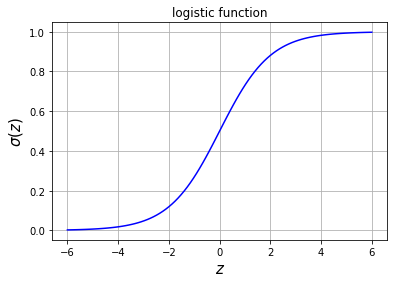

In [3]:
# Define the logistic function
def logistic(z): 
    return 1 / (1 + np.exp(-z))

# Plot the logistic function
z = np.linspace(-6,6,100)
plt.plot(z, logistic(z), 'b-')
plt.xlabel('$z$', fontsize=15)
plt.ylabel('$\sigma(z)$', fontsize=15)
plt.title('logistic function')
plt.grid()
plt.show()

Đạo hàm của Logistic Function.

In [4]:
# Define the logistic function
def logistic_derivative(z):
    return logistic(z) * (1 - logistic(z))

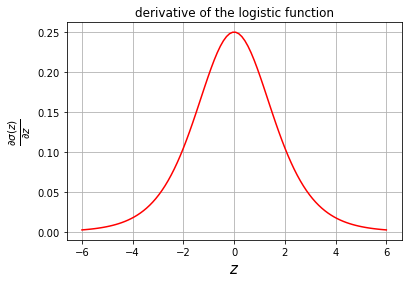

In [5]:
# Plot the derivative of the logistic function
z = np.linspace(-6,6,100)
plt.plot(z, logistic_derivative(z), 'r-')
plt.xlabel('$z$', fontsize=15)
plt.ylabel('$\\frac{\\partial \\sigma(z)}{\\partial z}$', fontsize=15)
plt.title('derivative of the logistic function')
plt.grid()
plt.show()

## Sinh dữ liệu với 2 tập điểm: xanh dương (t = 1), đỏ (t = 0)

In [6]:
# Define and generate the samples
num_of_samples_per_class = 50 # the number of sampel in each class
red_mean = [-1,0] # the mean of the red class
blue_mean = [1,0] # the mean of the blue class
stand_devi = 1.2 # the standard deviation of both classes

# Generate points of 2 classes
red_p = np.random.randn(num_of_samples_per_class, 2) * stand_devi + red_mean
blue_p = np.random.randn(num_of_samples_per_class, 2) * stand_devi + blue_mean

# Merge samples in set of input variables X, corresponding set of output variables t
X = np.vstack((red_p, blue_p))
t = np.vstack((np.zeros((num_of_samples_per_class,1)), np.ones((num_of_samples_per_class,1))))

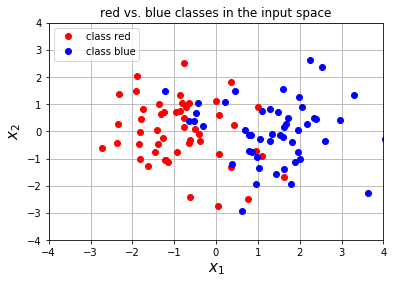

In [7]:
# Plot both classes on the x1, x2 plane
plt.plot(red_p[:,0], red_p[:,1], 'ro', label='class red')
plt.plot(blue_p[:,0], blue_p[:,1], 'bo', label='class blue')
plt.grid()
plt.legend(loc=2)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.axis([-4, 4, -4, 4])
plt.title('red vs. blue classes in the input space')
plt.show()

## Cross-entropy cost function for the logistic function

Mô hình y = σ(z) có thể được giải thích như sau: input z có thể thuộc về nhóm t = 1 với xác suất y, và nhóm t = 0 với xác suất 1 - y. Mô hình mạng Neural sẽ được tối ưu bằng cách tìm điểm cực đại hợp lệ sao cho với một tập các tham số θ của mô hình có thể dẫn đến một sự dự đoán chính xác nhóm của mỗi input mẫu. Những tham số θ chuyển mỗi input mẫu i (sample input) thành một input của hàm logistic function.

In [8]:
# Define the neural network function y = 1 / (1 + np.exp(-x * w))
def nn(x, w):
    return logistic(x.dot(w.T))

# Define the neural network prediction function that only returns
#  1 or 0 depending on the predicted class
def nn_predict(x, w):
    return np.around(nn(x, w))

# Define the cost function
def cost(y, t):
    return -np.sum(np.multiply(t, np.log(y)) + np.multiply((1 - t), np.log(1 - y)))

Minh hoạ cho hàm tổn thất với những trọng số weight cho trước:

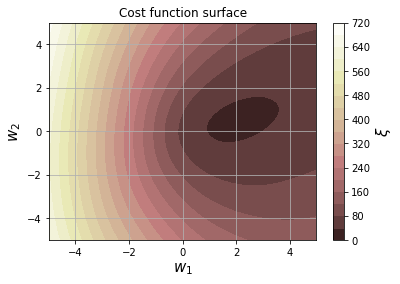

In [9]:
# Plot the cost in function of the weights
# Define a vector of weights for which we want to plot the cost
nb_of_ws = 100 # compute the cost nb_of_ws times in each dimension
ws1 = np.linspace(-5, 5, num = nb_of_ws) # weight 1
ws2 = np.linspace(-5, 5, num = nb_of_ws) # weight 2
ws_x, ws_y = np.meshgrid(ws1, ws2) # generate grid
cost_ws = np.zeros((nb_of_ws, nb_of_ws)) # initilize cost matrix

# Fill the cost matrix for each combination of weights
for i in range(nb_of_ws):
    for j in range(nb_of_ws):
        cost_ws[i,j] = cost(nn(X, np.asmatrix([ws_x[i,j], ws_y[i,j]])), t)
        
# Plot the cost function surface
plt.contourf(ws_x, ws_y, cost_ws, 20, cmap=cm.pink)
cbar = plt.colorbar()
cbar.ax.set_ylabel('$\\xi$', fontsize=15)
plt.xlabel('$w_1$', fontsize=15)
plt.ylabel('$w_2$', fontsize=15)
plt.title('Cost function surface')
plt.grid()
plt.show()

## Tối ưu hàm cost function với Gradient Descent

In [10]:
# define the gradient function
def gradient(w, x, t):
    return (nn(x, w) - t).T * x

# define the update function delta w which returns the delta w for each weight in a vector
def delta_w(w_k, x, t, learning_rate):
    return learning_rate * gradient(w_k, x, t)

## Gradient descent update

In [11]:
# set the initial weight parameter
w = np.asmatrix([-4, -2])

# set the learning rate
learning_rate = 0.05

# Start the gradient descent updates and plot the iterations
nb_of_iterations = 10
w_iter = [w]
for i in range(nb_of_iterations):
    dw = delta_w(w, X, t, learning_rate)
    w = w - dw
    w_iter.append(w)

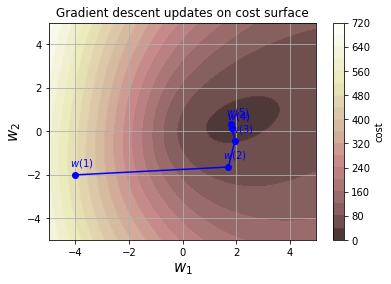

In [12]:
# Plot the first weight updates on the error surface
# Plot the error surface
plt.contourf(ws_x, ws_y, cost_ws, 20, alpha=0.9, cmap=cm.pink)
cbar = plt.colorbar()
cbar.ax.set_ylabel('cost')

# Plot the updates
for i in range(1, 6): 
    w1 = w_iter[i-1]
    w2 = w_iter[i]
    # Plot the weight-cost value and the line that represents the update
    plt.plot(w1[0,0], w1[0,1], 'bo')  # Plot the weight cost value
    plt.plot([w1[0,0], w2[0,0]], [w1[0,1], w2[0,1]], 'b-')
    plt.text(w1[0,0]-0.2, w1[0,1]+0.4, '$w({})$'.format(i), color='b')
w1 = w_iter[3]  
# Plot the last weight
plt.plot(w1[0,0], w1[0,1], 'bo')
plt.text(w1[0,0]-0.2, w1[0,1]+0.4, '$w({})$'.format(4), color='b') 
# Show figure
plt.xlabel('$w_1$', fontsize=15)
plt.ylabel('$w_2$', fontsize=15)
plt.title('Gradient descent updates on cost surface')
plt.grid()
plt.show()

## Trực quan hoá the trained classifier

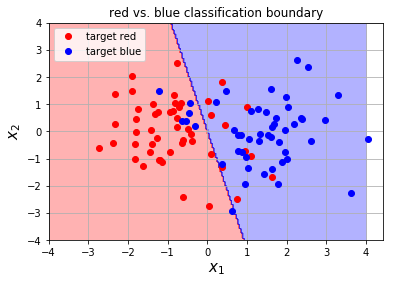

In [13]:
# Plot the resulting decision boundary
# Generate a grid over the input space to plot the color of the
#  classification at that grid point
nb_of_xs = 200
xs1 = np.linspace(-4, 4, num=nb_of_xs)
xs2 = np.linspace(-4, 4, num=nb_of_xs)
xx, yy = np.meshgrid(xs1, xs2) # create the grid
# Initialize and fill the classification plane
classification_plane = np.zeros((nb_of_xs, nb_of_xs))
for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        classification_plane[i,j] = nn_predict(np.asmatrix([xx[i,j], yy[i,j]]) , w)
# Create a color map to show the classification colors of each grid point
cmap = ListedColormap([
        colorConverter.to_rgba('r', alpha=0.30),
        colorConverter.to_rgba('b', alpha=0.30)])

# Plot the classification plane with decision boundary and input samples
plt.contourf(xx, yy, classification_plane, cmap=cmap)
plt.plot(red_p[:,0], red_p[:,1], 'ro', label='target red')
plt.plot(blue_p[:,0], blue_p[:,1], 'bo', label='target blue')
plt.grid()
plt.legend(loc=2)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.title('red vs. blue classification boundary')
plt.show()

# Hidden Layer

Hiện thực mô hình mạng Neural Network với 1 lớp ẩn.

In [14]:
# Python imports
import numpy as np # Matrix and vector computation package
import matplotlib.pyplot as plt  # Plotting library
from matplotlib.colors import colorConverter, ListedColormap # some plotting functions
from mpl_toolkits.mplot3d import Axes3D  # 3D plots
from matplotlib import cm # Colormaps
# Allow matplotlib to plot inside this notebook
%matplotlib inline
# Set the seed of the numpy random number generator so that the tutorial is reproducable
np.random.seed(seed=1)

## Định nghĩa tập dữ liệu

Tập dữ liệu là 1 tập 1D dataset được chia thành 2 nhóm: blue (t = 1) và red (t = 0). Tập này không được chia 1 cách tuyến tính, do đó với mô hình mạng neural đầu tiên sẽ không thể phân loại 1 cách chính xác.

In [15]:
# Define and generate the samples
nb_of_samples_per_class = 20  # The number of sample in each class
blue_mean = [0]  # The mean of the blue class
red_left_mean = [-2]  # The mean of the red class
red_right_mean = [2]  # The mean of the red class

std_dev = 0.5  # standard deviation of both classes
# Generate samples from both classes
x_blue = np.random.randn(nb_of_samples_per_class, 1) * std_dev + blue_mean
x_red_left = np.random.randn(nb_of_samples_per_class/2, 1) * std_dev + red_left_mean
x_red_right = np.random.randn(nb_of_samples_per_class/2, 1) * std_dev + red_right_mean

# Merge samples in set of input variables x, and corresponding set of
# output variables t
x = np.vstack((x_blue, x_red_left, x_red_right))
t = np.vstack((np.ones((x_blue.shape[0],1)), 
               np.zeros((x_red_left.shape[0],1)), 
               np.zeros((x_red_right.shape[0], 1))))

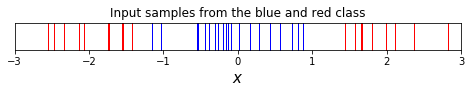

In [16]:
# Plot samples from both classes as lines on a 1D space
plt.figure(figsize=(8,0.5))
plt.xlim(-3,3)
plt.ylim(-1,1)
# Plot samples
plt.plot(x_blue, np.zeros_like(x_blue), 'b|', ms = 30) 
plt.plot(x_red_left, np.zeros_like(x_red_left), 'r|', ms = 30) 
plt.plot(x_red_right, np.zeros_like(x_red_right), 'r|', ms = 30) 
plt.gca().axes.get_yaxis().set_visible(False)
plt.title('Input samples from the blue and red class')
plt.xlabel('$x$', fontsize=15)
plt.show()

## Hàm phi tuyến - Non-linear transfer function

Có nhiều loại hàm phi tuyến có thể dùng ở đây, và có ưu điểm, nhược điểm khác nhau. Trong ví dụ này chúng ta sử dụng hàm Gausian Radial Basic Function (RBF) để hiện thực mạng Neural.
\begin{align}
\text{RBF} = \phi(z) = e^{-z^2}
\end{align}
Đạo hàm của hàm này:
\begin{align}
\frac{d \phi(z)}{dz} = -2 z e^{-z^2} = -2 z \phi(z)
\end{align}

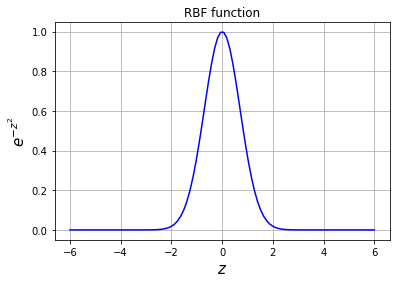

In [17]:
# Define the rbf function
def rbf(z):
    return np.exp(-z ** 2)

# Plot the rbf function
z = np.linspace(-6,6,100)
plt.plot(z, rbf(z), 'b-')
plt.xlabel('$z$', fontsize=15)
plt.ylabel('$e^{-z^2}$', fontsize=15)
plt.title('RBF function')
plt.grid()
plt.show()

## Optimize mô hình mạng bằng giải thuật BackPropagation

Mỗi vòng lặp của giải thuật này gồm 2 bước:
1. Forward Propagation: để tính output của mạng
Trong ví dụ này, ở bước Forward chúng ta cần tính những giá trị sau:
- Tính activation h của lớp ẩn (hidden layer):
\begin{align}
\mathbf{h} = \phi(\mathbf{x}*w_h) = e^{-(\mathbf{x}*w_h)^2}
\end{align}
- Tính activation **h** của output:
Output của lớp cuối cùng và mạng sẽ được tính bằng cách truyền activation **h** và input tới hàm logistic function.
\begin{align}
\mathbf{y} = \sigma(\mathbf{h} * w_o - 1) = \frac{1}{1+e^{-\mathbf{h} * w_o - 1}}
\end{align}

In [18]:
# Define the logistic function
def logistic(z): 
    return 1 / (1 + np.exp(-z))

# Function to compute the hidden activations
def hidden_activations(x, wh):
    return rbf(x * wh)

# Define output layer feedforward
def output_activations(h , wo):
    return logistic(h * wo - 1)

# Define the neural network function
def nn(x, wh, wo): 
    return output_activations(hidden_activations(x, wh), wo)

# Define the neural network prediction function that only returns
#  1 or 0 depending on the predicted class
def nn_predict(x, wh, wo): 
    return np.around(nn(x, wh, wo))

2. Backward Propagation: tại lớp cuối của mạng, lỗi của mô hình mạng so với tập dữ liệu thực tế sẽ được lan truyền ngược lại để tính, đồng thời thông qua đó tất cả các neuron sẽ cập nhật lại tham số của mình.
- Bước này sẽ bắt đầu tính cost các node output. Chi phí này sẽ được lan truyền ngược lại từng layer để nhằm mục đích điều chỉnh (cập nhật lại) các tham số học được.
- Để làm điều này, chúng ta dùng gradient descent để tối ưu dần dần.
- Hàm cost function:
\begin{align}
\xi(t_i,y_i) = - \left[ t_i log(y_i) + (1-t_i)log(1-y_i) \right]
\end{align}

In [19]:
# Define the cost function
def cost(y, t):
    return - np.sum(np.multiply(t, np.log(y)) + np.multiply((1-t), np.log(1-y)))

# Define a function to calculate the cost for a given set of parameters
def cost_for_param(x, wh, wo, t):
    return cost(nn(x, wh, wo) , t)

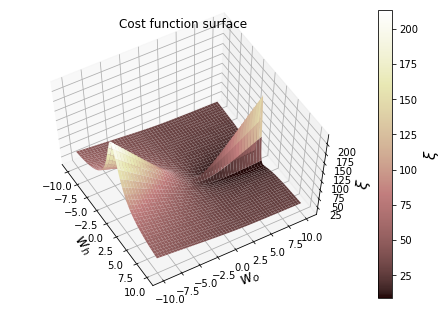

In [20]:
# Plot the cost in function of the weights
# Define a vector of weights for which we want to plot the cost
nb_of_ws = 200 # compute the cost nb_of_ws times in each dimension
wsh = np.linspace(-10, 10, num=nb_of_ws) # hidden weights
wso = np.linspace(-10, 10, num=nb_of_ws) # output weights
ws_x, ws_y = np.meshgrid(wsh, wso) # generate grid
cost_ws = np.zeros((nb_of_ws, nb_of_ws)) # initialize cost matrix
# Fill the cost matrix for each combination of weights
for i in range(nb_of_ws):
    for j in range(nb_of_ws):
        cost_ws[i,j] = cost(nn(x, ws_x[i,j], ws_y[i,j]) , t)
# Plot the cost function surface
fig = plt.figure()
ax = Axes3D(fig)
# plot the surface
surf = ax.plot_surface(ws_x, ws_y, cost_ws, linewidth=0, cmap=cm.pink)
ax.view_init(elev=60, azim=-30)
cbar = fig.colorbar(surf)
ax.set_xlabel('$w_h$', fontsize=15)
ax.set_ylabel('$w_o$', fontsize=15)
ax.set_zlabel('$\\xi$', fontsize=15)
cbar.ax.set_ylabel('$\\xi$', fontsize=15)
plt.title('Cost function surface')
plt.grid()
plt.show()

- Cập nhật output layer
- Cập nhật hidden layer

In [21]:
# Define the error function
def gradient_output(y, t):
    return y - t

# Define the gradient function for the weight parameter at the output layer
def gradient_weight_out(h, grad_output):
    return h * grad_output

# Define the gradient function for the hidden layer
def gradient_hidden(wo, grad_output):
    return wo * grad_output

# Define the gradient function for the weight parameter at the hidden layer
def gradient_weight_hidden(x, zh, h, grad_hidden):
    return x * -2 * zh * h * grad_hidden

# Define the update function to update the network parameters over 1 iteration
def backdrop_update(x, t, wh, wo, learning_rate):
    # Compute the output of the network
    # This can be done with y = nn(x, wh, wo), but we need the intermediate h and zh for the weight updates
    zh = x * wh
    h = rbf(zh)
    y = output_activations(h, wo)
    # Compute the gradient at the output
    grad_output = gradient_output(y, t)
    # Get the delta for wo
    d_wo = learning_rate * gradient_weight_out(h, grad_output)
    # Compute the gradient at the hidden layer
    grad_hidden = gradient_hidden(wo, grad_output)
    # Get the delta for wh
    d_wh = learning_rate * gradient_weight_hidden(x, zh, h, grad_hidden)
    # return the update parameters
    return (wh-d_wh.sum(), wo-d_wo.sum())

## Backpropagation updates

In [22]:
# Run backpropagation
# Set the initial weight parameter
wh = 2
wo = -5
# Set the learning rate
learning_rate = 0.2

# Start the gradient descent updates and plot the iterations
nb_of_iterations = 50  # number of gradient descent updates
lr_update = learning_rate / nb_of_iterations # learning rate update rule
w_cost_iter = [(wh, wo, cost_for_param(x, wh, wo, t))]  # List to store the weight values over the iterations
for i in range(nb_of_iterations):
    learning_rate -= lr_update # decrease the learning rate
    # Update the weights via backpropagation
    wh, wo = backdrop_update(x, t, wh, wo, learning_rate) 
    w_cost_iter.append((wh, wo, cost_for_param(x, wh, wo, t)))  # Store the values for plotting

# Print the final cost
print('final cost is {:.2f} for weights wh: {:.2f} and wo: {:.2f}'.format(cost_for_param(x, wh, wo, t), wh, wo))


final cost is 9.55 for weights wh: 1.07 and wo: 5.05


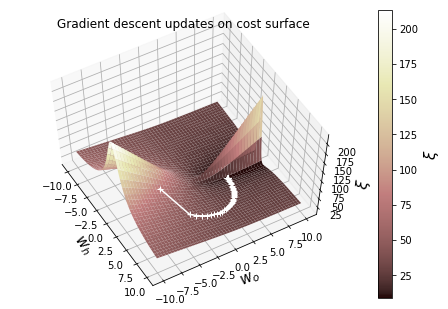

In [23]:
# Plot the weight updates on the error surface
# Plot the error surface
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_surface(ws_x, ws_y, cost_ws, linewidth=0, cmap=cm.pink)
ax.view_init(elev=60, azim=-30)
cbar = fig.colorbar(surf)
cbar.ax.set_ylabel('$\\xi$', fontsize=15)

# Plot the updates
for i in range(1, len(w_cost_iter)):
    wh1, wo1, c1 = w_cost_iter[i-1]
    wh2, wo2, c2 = w_cost_iter[i]
    # Plot the weight-cost value and the line that represents the update 
    ax.plot([wh1], [wo1], [c1], 'w+')  # Plot the weight cost value
    ax.plot([wh1, wh2], [wo1, wo2], [c1, c2], 'w-')
# Plot the last weights
wh1, wo1, c1 = w_cost_iter[len(w_cost_iter)-1]
ax.plot([wh1], [wo1], c1, 'w+')
# Shoz figure
ax.set_xlabel('$w_h$', fontsize=15)
ax.set_ylabel('$w_o$', fontsize=15)
ax.set_zlabel('$\\xi$', fontsize=15)
plt.title('Gradient descent updates on cost surface')
plt.grid()
plt.show()

## Trực quan hoá mô hình mạng neural để phân loại

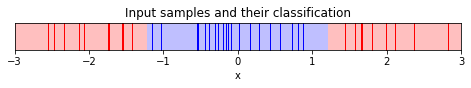

In [24]:
# Plot the resulting decision boundary
# Generate a grid over the input space to plot the color of the
#  classification at that grid point
nb_of_xs = 100
xs = np.linspace(-3, 3, num=nb_of_xs)
ys = np.linspace(-1, 1, num=nb_of_xs)
xx, yy = np.meshgrid(xs, ys) # create the grid
# Initialize and fill the classification plane
classification_plane = np.zeros((nb_of_xs, nb_of_xs))
for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        classification_plane[i,j] = nn_predict(xx[i,j], wh, wo)
# Create a color map to show the classification colors of each grid point
cmap = ListedColormap([
        colorConverter.to_rgba('r', alpha=0.25),
        colorConverter.to_rgba('b', alpha=0.25)])

# Plot the classification plane with decision boundary and input samples
plt.figure(figsize=(8,0.5))
plt.contourf(xx, yy, classification_plane, cmap=cmap)
plt.xlim(-3,3)
plt.ylim(-1,1)
# Plot samples from both classes as lines on a 1D space
plt.plot(x_blue, np.zeros_like(x_blue), 'b|', ms = 30) 
plt.plot(x_red_left, np.zeros_like(x_red_left), 'r|', ms = 30) 
plt.plot(x_red_right, np.zeros_like(x_red_right), 'r|', ms = 30) 
plt.gca().axes.get_yaxis().set_visible(False)
plt.title('Input samples and their classification')
plt.xlabel('x')
plt.show()

## Hàm phân loại - Softmax Classification Function

Những ví dụ trước, mạng neural được hiện thực với sự trợ giúp của logistic function. Ở ví dụ này, mạng neural sẽ dùng softmax function, một hàm mở rộng của logistic function.

In [25]:
# Python imports
import numpy as np # Matrix and vector computation package
import matplotlib.pyplot as plt  # Plotting library
from matplotlib.colors import colorConverter, ListedColormap # some plotting functions
from mpl_toolkits.mplot3d import Axes3D  # 3D plots
from matplotlib import cm # Colormaps
# Allow matplotlib to plot inside this notebook
%matplotlib inline

Sự giới hạn của logistic function là nó chỉ có thể phân loại thành 2 nhóm: t = 1 và t = 0. Với bài toán có nhiều nhóm hơn, chúng ta cần sử dụng softmax function.

In [26]:
# Define the softmax function, z la 1 vecto
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

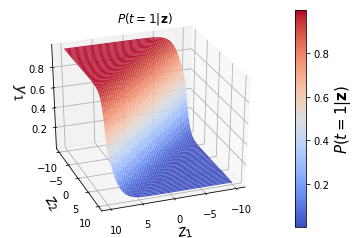

In [27]:
# Plot the softmax output for 2 dimensions for both classes
# Plot the output in function of the weights
# Define a vector of weights for which we want to plot the ooutput
nb_of_zs = 200
zs = np.linspace(-10, 10, num=nb_of_zs) # input 
zs_1, zs_2 = np.meshgrid(zs, zs) # generate grid
y = np.zeros((nb_of_zs, nb_of_zs, 2)) # initialize output
# Fill the output matrix for each combination of input z's
for i in range(nb_of_zs):
    for j in range(nb_of_zs):
        y[i,j,:] = softmax(np.asarray([zs_1[i,j], zs_2[i,j]]))
# Plot the cost function surfaces for both classes
fig = plt.figure()
# Plot the cost function surface for t=1
ax = fig.gca(projection='3d')
surf = ax.plot_surface(zs_1, zs_2, y[:,:,0], linewidth=0, cmap=cm.coolwarm)
ax.view_init(elev=30, azim=70)
cbar = fig.colorbar(surf)
ax.set_xlabel('$z_1$', fontsize=15)
ax.set_ylabel('$z_2$', fontsize=15)
ax.set_zlabel('$y_1$', fontsize=15)
ax.set_title ('$P(t=1|\mathbf{z})$')
cbar.ax.set_ylabel('$P(t=1|\mathbf{z})$', fontsize=15)
plt.grid()
plt.show()

## Vectorization

Ví dụ này mô tả 1 mạng neural để phân nhóm với tập dữ liệu input 2 chiều, đưa qua 3 hidden layer và cuối cùng phân loại với hàm softmax cho ra output 2 chiều.

In [28]:
# Python imports
import numpy as np  # Matrix and vector computation package
import sklearn.datasets # To generate the dataset
import matplotlib.pyplot as plt  # Plotting library
from matplotlib.colors import colorConverter, ListedColormap  # Some plotting functions
from mpl_toolkits.mplot3d import Axes3D  # 3D plots
from matplotlib import cm  # Colormaps
# Allow matplotlib to plot inside this notebook
%matplotlib inline
# Set the seed of the numpy random number generator so that the tutorial is reproducable
np.random.seed(seed=1)

## Định nghĩa tập Dataset

In [29]:
# Generate the dataset
X, t = sklearn.datasets.make_circles(n_samples=100, shuffle=False, factor=0.3, noise=0.1)
T = np.zeros((100,2)) # Define target matrix
T[t==1,1] = 1
T[t==0,0] = 1
# Separate the red and blue points for plotting
x_red = X[t==0]
x_blue = X[t==1]

print('shape of X: {}'.format(X.shape))
print('shape of T: {}'.format(T.shape))

shape of X: (100, 2)
shape of T: (100, 2)


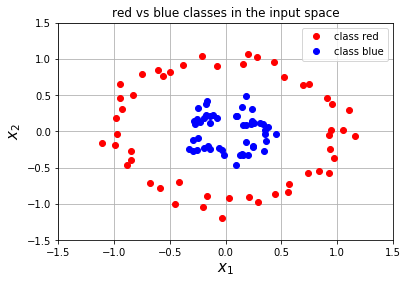

In [30]:
plt.plot(x_red[:,0], x_red[:,1], 'ro', label='class red')
plt.plot(x_blue[:,0], x_blue[:,1], 'bo', label='class blue')
plt.grid()
plt.legend(loc=1)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.title('red vs blue classes in the input space')
plt.show()

## Vectorization of forward step

In [31]:
# Define the logistic function
def logistic(z):
    return 1 / (1 + np.exp(-z))

# Define the softmax function
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)

# Function to compute the hidden activations
def hidden_activations(X, Wh, bh):
    return logistic(X.dot(Wh) + bh)

# Define output layer feedforward
def output_activations(H, Wo, bo):
    return softmax(H.dot(Wo) + bo)

# Define the neural network function:
def nn(X, Wh, bh, Wo, bo):
    return output_activations(hidden_activations(X, Wh, bh), Wo, bo)

# Define the neural network prediction function that only returns
#  1 or 0 depending on the predicted class
def nn_predict(X, Wh, bh, Wo, bo): 
    return np.around(nn(X, Wh, bh, Wo, bo))

## Vectorization of backward step

1. Tính error tại lớp output:
Lớp output là một lớp softmax với giá trị hàm lỗi tương ứng cross-entropy cost function.

2. Cập nhật output layer bias:


In [32]:
# Define the cost function
def cost(Y, T):
    return - np.multiply(T, np.log(Y)).sum()

# Define the error function at the output
def error_output(Y, T):
    return Y - T

# Define the gradient function for the weight parameters at the output layer
def gradient_weight_out(H, Eo):
    return H.T.dot(Eo)

# Define the gradient function for the bias parameters at the output layer
def gradient_bias_out(Eo):
    return np.sum(Eo, axis=0, keepdims=True)

## Vectorization of hidden layer backward step:

In [33]:
# Define the error function at the hidden layer
def error_hidden(H, Wo, Eo):
    # H * (1-H) * (E.Wo^T)
    return np.multiply(np.multiply(H,(1-H)), Eo.dot(Wo.T))

# Define the gradient function for the weight parameters at the hidden layer
def gradient_weight_hidden(X, Eh):
    return X.T.dot(Eh)

# Define the gradient function for the bias parameters at the output layer
def gradient_bias_hidden(Eh):
    return np.sum(Eh, axis=0, keepdims=True)

## Gradient checking

In [34]:
# Initialize weights and biases
init_var = 1
# Initialize hidden layer parameters
bh = np.random.randn(1, 3) * init_var
Wh = np.random.randn(2, 3) * init_var
# Initialize output layer parameters
bo = np.random.randn(1, 2) * init_var
Wo = np.random.randn(3, 2) * init_var

# Compute the gradients by backpropagation
# Compute the activations of the layers
H = hidden_activations(X, Wh, bh)
Y = output_activations(H, Wo, bo)
# Compute the gradients of the output layer
Eo = error_output(Y, T)
JWo = gradient_weight_out(H, Eo)
Jbo = gradient_bias_out(Eo)
# Compute the gradients of the hidden layer
Eh = error_hidden(H, Wo, Eo)
JWh = gradient_weight_hidden(X, Eh)
Jbh = gradient_bias_hidden(Eh)

In [35]:
# Combine all parameter matrices in a list
params = [Wh, bh, Wo, bo]
# Combine all parameter gradients in a list
grad_params = [JWh, Jbh, JWo, Jbo]

# Set the small change to compute the numerial gradient
eps = 0.0001

# Check each parameter matrix
for p_idx in range(len(params)):
    # Check each parameter in each parameter matrix
    for row in range(params[p_idx].shape[0]):
        for col in range(params[p_idx].shape[1]):
            # Copy the parameter matrix and change the current parameter slightly
            p_matrix_min = params[p_idx].copy()
            p_matrix_min[row, col] -= eps
            p_matrix_plus = params[p_idx].copy()
            p_matrix_plus[row, col] += eps
            # Copy the parameter list, and change the updated parameter matrix
            params_min = params[:]
            params_min[p_idx] = p_matrix_min
            params_plus = params[:]
            params_plus[p_idx] =  p_matrix_plus
            # Compute the numerical gradient
            grad_num = (cost(nn(X, *params_plus), T) - cost(nn(X, *params_min), T)) / (2 * eps)
            # Raise error if the numerical grade is not close to the backprop gradient
            if not np.isclose(grad_num, grad_params[p_idx][row, col]):
                raise ValueError('Numerical gradient of {:.6f} is not close to the backpropagation gradient of {:.6f}!'.format(float(grad_num), float(grad_params[p_idx][row,col])))
print('No gradient errors found')

No gradient errors found


## Backpropagation updates with momentum

Nếu dùng gradient decent thông thường, chỉ có thể optimize các tham số của hàm cost function của mạng neural đơn giản. Đối với mạng neural có nhiều lớp với hàm truyền dạng phi tuyến (non-linear activation function), chúng ta cần sử dụng phương sai của gradient decent được gọi là momentum.

In [36]:
# Define the update function to update the network parameters over 1 iteration
def backprop_gradients(X, T, Wh, bh, Wo, bo):
    # Compute the output of the network
    # Compute the activations of the layers
    H = hidden_activations(X, Wh, bh)
    Y = output_activations(H, Wo, bo)
    # Compute the gradients of the output layer
    Eo = error_output(Y, T)
    JWo = gradient_weight_out(H, Eo)
    Jbo = gradient_bias_out(Eo)
    # Compute the gradients of the hidden layer
    Eh = error_hidden(H, Wo, Eo)
    JWh = gradient_weight_hidden(X, Eh)
    Jbh = gradient_bias_hidden(Eh)
    return [JWh, Jbh, JWo, Jbo]

def update_velocity(X, T, ls_of_params, Vs, momentum_term, learning_rate):
    # ls_of_params = [Wh, bh, Wo, bo]
    # Js = [Jwh, Jbh, JWo, Jbo]
    Js = backprop_gradients(X, T, *ls_of_params)
    return [momentum_term * V - learning_rate * J for V,J in zip(Vs, Js)]

def update_params(ls_of_params, Vs):
    # ls_of_params = [Wh, bh, Wo, bo]
    # Vs = [VWh, Vbh, VWo, Vbo]
    return [P + V for P,V in zip(ls_of_params, Vs)]

Quá trình training mạng neural network này được trải qua với 300 vòng lặp trên tập dataset X và T.

In [37]:
# Run backpropagation
# Initialize weights and biases
init_var = 0.1
# Initialize hidden layer parameters
bh = np.random.randn(1, 3) * init_var
Wh = np.random.randn(2, 3) * init_var
# Initialixe output layer parameters
bo = np.random.randn(1, 2) * init_var
Wo = np.random.randn(3, 2) * init_var
# Parameters are already initialized randomly with the gradient checking
# Set the learning rate
learning_rate = 0.02
momentum_term = 0.9

# define the velocities Vs = [VWh, Vbh, VWo, Vbo]
Vs = [np.zeros_like(M) for M in [Wh, bh, Wo, bo]]

# start the gradient descent updates and plot the iterations
np_of_iterations = 300 # num of iterations: num of gradient descent updates
lr_update = learning_rate / np_of_iterations # learning rate update rule
ls_costs = [cost(nn(X, Wh, bh, Wo, bo), T)] # list of cost over iterations
for i in range(np_of_iterations):
    # Update the velocities and the parameters
    Vs = update_velocity(X, T, [Wh, bh, Wo, bo], Vs, momentum_term, learning_rate)
    Wh, bh, Wo, bo = update_params([Wh, bh, Wo, bo], Vs)
    ls_costs.append(cost(nn(X, Wh, bh, Wo, bo), T))

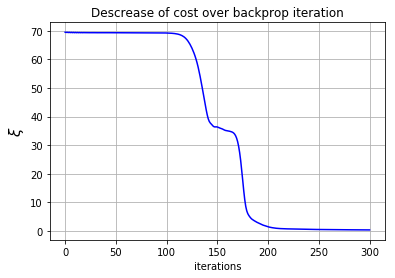

In [38]:
# Plot the cost over the iterations
plt.plot(ls_costs, 'b-')
plt.xlabel('iterations')
plt.ylabel('$\\xi$', fontsize=15)
plt.title('Descrease of cost over backprop iteration')
plt.grid()
plt.show()

## Visualization of the trained classifier

In [39]:
# Plot the resulting decision boundary
# Generate a grid over the input space to plot the color of the
#  classification at that grid point
nb_of_xs = 200
xs1 = np.linspace(-2, 2, num=nb_of_xs)
xs2 = np.linspace(-2, 2, num=nb_of_xs)
xx, yy = np.meshgrid(xs1, xs2) # create the grid
# Initialize and fill the classification plane
classification_plane = np.zeros((nb_of_xs, nb_of_xs))
for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        pred = nn_predict(np.asmatrix([xx[i,j], yy[i,j]]), Wh, bh, Wo, bo)
        classification_plane[i,j] = pred[0,0]
# Create a color map to show the classification colors of each grid point
cmap = ListedColormap([
        colorConverter.to_rgba('b', alpha=0.30),
        colorConverter.to_rgba('r', alpha=0.30)])

# Plot the classification plane with decision boundary and input samples
plt.contourf(xx, yy, classification_plane, cmap=cmap)
# Plot both classes on the x1, x2 plane
plt.plot(x_red[:,0], x_red[:,1], 'ro', label='class red')
plt.plot(x_blue[:,0], x_blue[:,1], 'bo', label='class blue')
plt.grid()
plt.legend(loc=1)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.title('red vs blue classification boundary')
plt.show()

TypeError: sum() got an unexpected keyword argument 'keepdims'

# Ứng dụng của Neural Network với Regression

## Import các thư viện cần thiết

In [9]:
# Python imports
import numpy as np # Matrix and vector computation package
import matplotlib.pyplot as plt  # Plotting library
np.random.seed(seed=1)
from matplotlib.colors import colorConverter, ListedColormap # some plotting functions
import itertools
import collections
import math
rng = np.random.RandomState(1311)

## Hàm tạo và chia tập dữ liệu

In [10]:
def f_function(nb_of_samples):
    # Target function
    x = np.arange(0, 2 * math.pi, 0.001)
    t = np.sin(x) # Function: sin

    # Create the dataset with gaussian noise based on target function
    x1 = np.random.uniform(0, 1, nb_of_samples)
    noise_variance = 0.2
    noise = np.random.randn(x1.shape[0]) * noise_variance
    y = np.sin(2 * np.pi * 1 * x1 + 0) + noise
    dataX = 2 * np.pi * 1 * x1 + 0
    return (dataX, y)

def devideDataset(data1, label1, numOfTrain, numOfValidation):
    train_X = data1[0:numOfTrain]

    train_Y = label1[0:numOfTrain]

    val_X = data1[numOfTrain:(numOfTrain + numOfValidation)]

    val_Y = label1[numOfTrain:(numOfTrain + numOfValidation)]

    test_X = data1[(numOfTrain + numOfValidation):]

    test_Y = label1[(numOfTrain + numOfValidation):]

    return (train_X, train_Y, val_X, val_Y, test_X, test_Y)

## Mô hình mạng Neural Network

In [18]:
# Activation functions
def sigmoid(X, bp = False):
    if (not bp):
        return 1.0/(1.0 + np.exp(-X))
    else:
        sig = 1.0/(1.0 + np.exp(-X))
        return sig * (1 - sig)

def relu(X, bp = False):
    result = X
    if (not bp):
        result = X
        result[X < 0] = 0
    else:
        result[X > 0] = 1
        result[X <= 0] = 0
    return result

def softmax(X):
    # Assume that the second dim is the feature dim
    max_input = np.max(X, 1, keepdims=True)
    X_max = X - max_input
    e = np.exp(X_max)
    sum_e = np.sum(e, 1, keepdims=True)
    return e / sum_e

def logistic(z):
    return 1 / (1 + np.exp(-z))

def logistic_deriv(y):  # Derivative of logistic function
    return np.multiply(y, (1 - y))

# Define the cost function
def cost(y, t):
    # pdb.set_trace()
    return 0.5 * ((t - y)**2).sum()

def activation_function(X, type, bp = False):
    if (type == "sigmoid"):
        return sigmoid(X, bp)
    elif (type == "relu"):
        return relu(X, bp)
    else:
        raise ValueError("Activation function not recognized")

# Define layers used in this model
class Layer(object):
    """Base class for the different layers.
    Defines base methods and documentation of methods."""
    
    def get_params_iter(self):
        return []
    
    def get_params_grad(self, X, output_grad):
        return []
    
    def get_output(self, X):
        pass
    
    def get_input_grad(self, Y, output_grad=None, T=None):
        pass

class LinearLayer(Layer):
    """The linear layer performs a linear transformation to its input."""
    
    def __init__(self, n_in, n_out):
        self.W = np.random.randn(n_in, n_out) * 0.1
        self.b = np.zeros(n_out)
        
    def get_params_iter(self):
        """Return an iterator over the parameters."""
        return itertools.chain(np.nditer(self.W, op_flags=['readwrite']),
                                np.nditer(self.b, op_flags=['readwrite']))
    
    def get_output(self, X):
        """Perform the forward step linear transformation."""
        return X.dot(self.W) + self.b
    
    def get_params_grad(self, X, output_grad):
        """Return a list of gradients over the parameters."""
        JW = X.T.dot(output_grad)
        Jb = np.sum(output_grad, axis=0)
        return [g for g in itertools.chain(np.nditer(JW), np.nditer(Jb))]
    
    def get_input_grad(self, Y, output_grad):
        """Return the gradient at the inputs of this layer."""
        return output_grad.dot(self.W.T)

class NonLinearLayer(Layer):
    """The logistic layer applies the logistic function to its inputs."""
    
    def get_output(self, X):
        """Perform the forward step transformation."""
        return logistic(X)
#         return activation_function(X, 'sigmoid')
    
    def get_input_grad(self, Y, output_grad):
        """Return the gradient at the inputs of this layer."""
#         return np.multiply(activation_function(Y, 'sigmoid', True), output_grad)
        return np.multiply(logistic_deriv(Y), output_grad)

class OutputLayer(Layer):
    """The softmax output layer computes the classification propabilities at the output."""
    
    def get_output(self, X):
        """Perform the forward step transformation."""
        # return softmax(X)
        return X
    
    def get_input_grad(self, Y, T):
        """Return the gradient at the inputs of this layer."""
        return (Y - T) #/ Y.shape[0]
    
    def get_cost(self, Y, T):
        """Return the cost at the output of this output layer."""
        # return - np.multiply(T, np.log(Y)).sum() / Y.shape[0]
        return cost(Y, T)

# Define the forward propagation step as a method
def forward_step(input_samples, layers):
    activations = [input_samples] # List of layer acctivations
    # Compute the forward activations for each layer starting from the first
    X = input_samples
    for layer in layers:
        Y = layer.get_output(X) # Get the output of the current layer
        activations.append(Y)
        X = activations[-1]
    return activations

# Define the backward propagation step as a method
def backward_step(activations, targets, layers):
    param_grads = collections.deque() # List of parameter gradients for each layer
    output_grad = None # The error gradient at the output of the current layer

    for layer in reversed(layers):
        Y = activations.pop() # Get the activations of the last layer on the stack
        # Compute the error at the output layer
        # The output layer error is calculated different then hidden layer error
        if output_grad is None:
            input_grad = layer.get_input_grad(Y, targets)
        else:
            input_grad = layer.get_input_grad(Y, output_grad)
            
        # Get the input of this layer (activations of the previous layer)
        X = activations[-1]

        # Compute the layer parameter gradients used to update the parameters
        grads = layer.get_params_grad(X, output_grad)
       
        param_grads.appendleft(grads)
        # Compute gradient at output of previous layer (input of current layer)
        output_grad = input_grad
    return list(param_grads)


# Define a method to update the parameters
def update_params(layers, param_grads, learning_rate):
    """
    Function to update the parameters of the given layers with the given gradients
    by gradient descent with the given learning rate.
    """
    for layer, layer_backprop_grads in zip(layers, param_grads):
        for param, grad in itertools.izip(layer.get_params_iter(), layer_backprop_grads):
            # The parameter returned by the iterator point to the memory space of
            #  the original layer and can thus be modified inplace.
            param -= learning_rate * grad  # Update each parameter

# Define gradient checking
def gradient_checking(layers, X_train, T_train, oneD=False):
    # Perform gradient checking
    # print "++++++++ checking gradient ++++++++++"
    nb_samples_gradientcheck = 5 # Test the gradients on a subset of the data
    if oneD == False:
        X_temp = X_train[0:nb_samples_gradientcheck,:]
        T_temp = T_train[0:nb_samples_gradientcheck,:]
    else:
        X_temp = X_train[0:nb_samples_gradientcheck].reshape((nb_samples_gradientcheck,1))
        T_temp = T_train[0:nb_samples_gradientcheck].reshape((nb_samples_gradientcheck,1))

    # Get the parameter gradients with backpropagation
    activations = forward_step(X_temp, layers)
#     for i in range(len(activations)):
#         print "activation ", i
#         print activations[i]

    param_grads = backward_step(activations, T_temp, layers)

#     for i in range(len(layers)):
#         print "\tparam ",i
#         print param_grads[i]

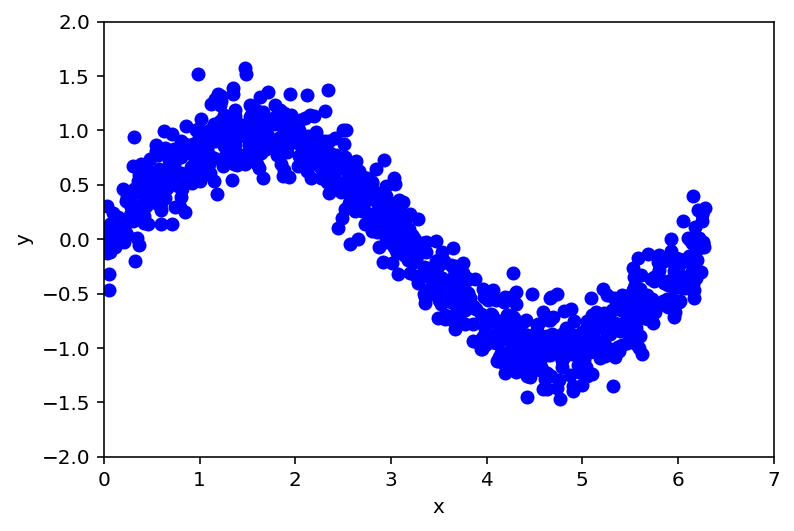

In [21]:
# Create dataset
(X, Y) = f_function(1000)
# print X

# Draw data
%config InlineBackend.figure_format = 'retina'
plt.plot(X, Y, 'bo')
plt.axis([0, 7, -2, 2])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Devide dataset
numOfTrain = 500
numOfValidation = 250
train_X, train_Y, val_X, val_Y, test_X, test_Y = devideDataset(X, Y, numOfTrain, numOfValidation)
# print len(train_X)
# print len(val_X)
# print len(test_X)

# Define a sample model to be trained on the data
hidden_neurons_1 = 4  # Number of neurons in the first hidden-layer
# Create the model
layers = []
# Add first hidden layer
layers.append(LinearLayer(1, hidden_neurons_1))
layers.append(NonLinearLayer())
# # Add output layer
layers.append(LinearLayer(hidden_neurons_1, 1))
layers.append(OutputLayer())

# print "layer 0 - W1", layers[0].W
# print "layer 0 - b1", layers[0].b
# print "layer 2 - W2", layers[2].W
# print "layer 2 - b2", layers[2].b

gradient_checking(layers, train_X, train_Y, True)

# Create mini-batches

# initalize some lists to store the cost for future analysis        
all_costs = []

max_nb_of_iterations = 10000  # Train for a maximum of 300 iterations
learning_rate = 0.001  # Gradient descent learning rate
X = train_X.reshape(train_X.shape[0],1)
Y = train_Y.reshape(train_Y.shape[0],1)

## Quá trình Training mạng

In [20]:
for iteration in range(max_nb_of_iterations):
    activations = forward_step(X, layers)

    cost = layers[-1].get_cost(activations[-1], Y)  # Get cost
    all_costs.append(cost)

    param_grads = backward_step(activations, Y, layers)  # Get the gradients
    update_params(layers, param_grads, learning_rate)

    print('cost at iteration %d is %f' %(iteration, cost))


# visualization
x_visualize = np.arange(0, 2 * math.pi, 0.005)

# forward step
activations = forward_step(x_visualize.reshape(x_visualize.shape[0],1), layers)
y_visualize = activations[-1]
y_true = np.sin(x_visualize )

# Draw data

plt.plot(x_visualize, y_visualize, 'bo')
plt.plot(x_visualize, y_true, 'ro')

plt.axis([0, 7, -2, 2])
plt.xlabel('x')
plt.ylabel('y')
plt.show()


cost at iteration 0 is 133.438071


TypeError: 'numpy.float64' object is not callable